In [1]:
import numpy as np
import vtk
import networkx as nx
import matplotlib as mpl
import matplotlib.pyplot as plt

from mcopt.util.io import load_complex
from mcopt.morse_complex import MorseComplex
from mcopt.morse_graph import MorseGraph


%reload_ext autoreload
%autoreload 2

# Load Morse Complex

In [2]:
mc = load_complex('../data/sinusoidal')

# Construct Morse Graph

In [3]:
mg = MorseGraph.from_complex(mc)

# Construct Simplifications

In [4]:
simp_step = mg.simplify(min_length=8, mode='step')

simp_geo = mg.simplify(min_length=4, mode='geo_dist')

# Draw Graphs

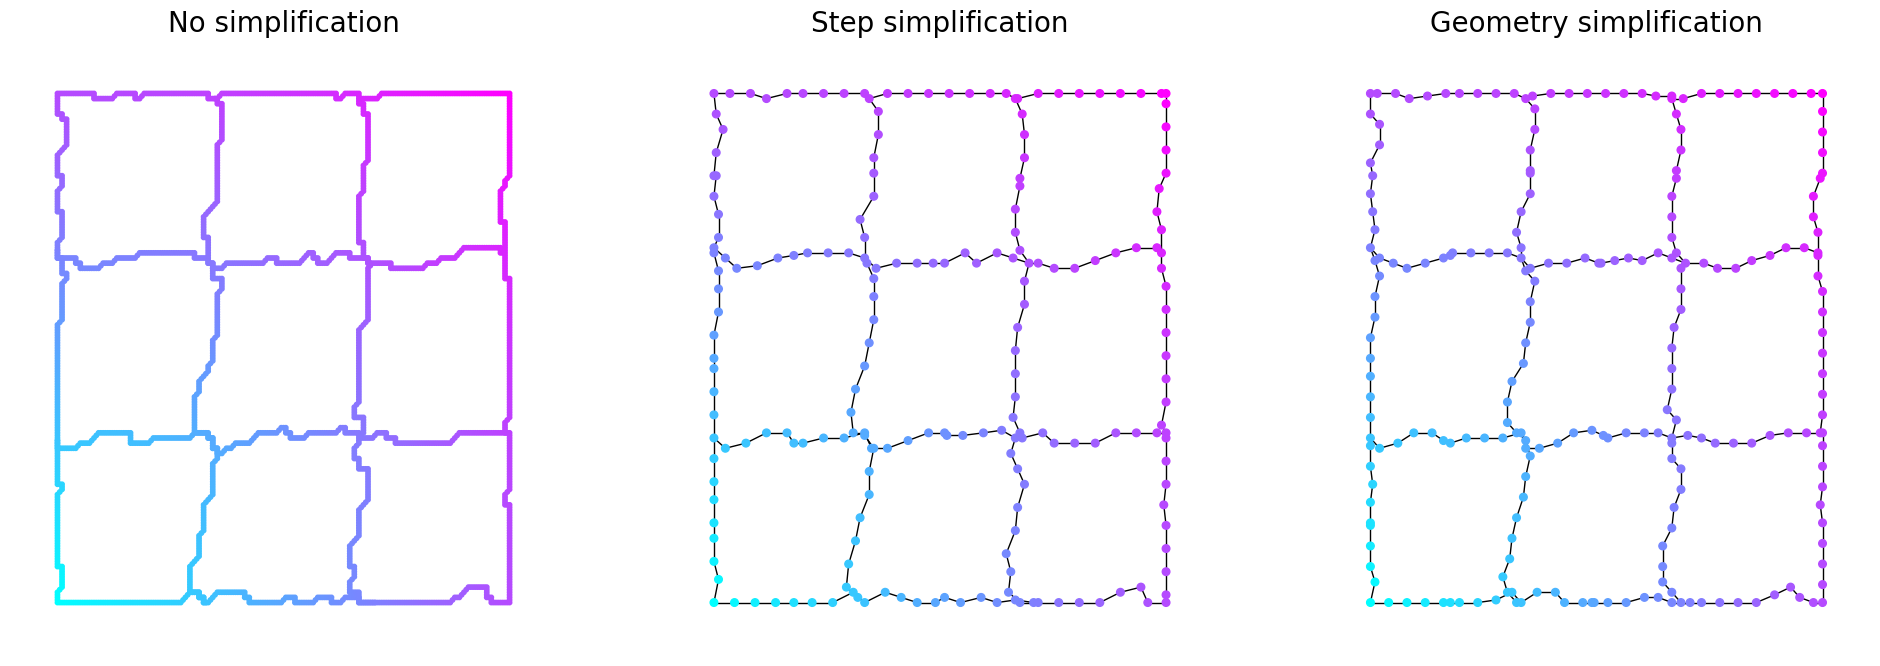

In [5]:
fig, axis = plt.subplots(1, 3, figsize=(24, 8))
cmap = 'cool'

mg.draw(ax=axis[0], cmap=cmap)
axis[0].set_title('No simplification', fontsize=20)

simp_step.draw(ax=axis[1], node_size=30, cmap=cmap)
axis[1].set_title('Step simplification', fontsize=20)

simp_geo.draw(ax=axis[2], node_size=30, cmap=cmap)
axis[2].set_title('Geometry simplification', fontsize=20)

plt.show()
